In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42

In [33]:
train = pd.read_csv('train.csv')
train_info = pd.read_csv('working.csv')

In [34]:
test = pd.read_csv('usefull_test.csv')
test_info = pd.read_csv('test_info.csv')

In [35]:
train_info.head()

,Unnamed: 0,1Q,2Q,IQR,fpath,label,max,mean,median,min,skew,std
0,0,6.230491,27.272478,21.041986,audio_train/audio_train/00044347.wav,Hi-hat,577.259387,24.051130,13.204853,0.099928,4.257246,34.076773
1,1,5.674157,35.867089,30.192933,audio_train/audio_train/001ca53d.wav,Saxophone,3170.740614,49.153424,13.990031,0.006609,8.895209,141.165615
2,2,0.012762,0.066496,0.053734,audio_train/audio_train/002d256b.wav,Trumpet,7.276662,0.089362,0.029888,0.000128,13.358796,0.264248
3,3,0.420803,0.977241,0.556438,audio_train/audio_train/0033e230.wav,Glockenspiel,788.281803,1.144892,0.674073,0.000313,63.396895,7.775617
4,4,0.646084,3.692972,3.046888,audio_train/audio_train/00353774.wav,Cello,5414.037780,7.551387,1.383008,0.006342,40.976874,61.102422


In [36]:
test_info.head()

,Unnamed: 0,1Q,2Q,IQR,fpath,label,max,mean,median,min,skew,std
0,4,0.014061,0.084795,0.070734,audio_test/00326aa9.wav,Oboe,7401.268468,1.379161,0.027823,0.000057,98.376364,55.144232
1,5,0.013394,0.245053,0.231659,audio_test/0038a046.wav,Bass_drum,333.812542,1.707540,0.042594,0.000080,13.619772,14.784074
2,8,0.215369,1.058884,0.843515,audio_test/007759c4.wav,Saxophone,4828.587852,3.166389,0.469748,0.001129,55.834790,50.364841
3,9,2.021793,18.280822,16.259030,audio_test/008afd93.wav,Saxophone,5139.050317,37.776967,5.585608,0.009497,13.582068,171.065620
4,12,1.804103,18.081657,16.277554,audio_test/00ae03f6.wav,Chime,642.191062,20.374544,5.233917,0.006413,4.841297,44.072928


In [37]:
labels = list(train_info.label.unique())

In [38]:
labels_dict = {}
for i in range(len(labels)):
    labels_dict[labels[i]] = i

In [40]:
label_n = [labels_dict[label] for label in train_info.label]
test_label_n = [labels_dict[label] for label in test_info.label]

In [42]:
train_info.label = label_n
test_info.label = test_label_n

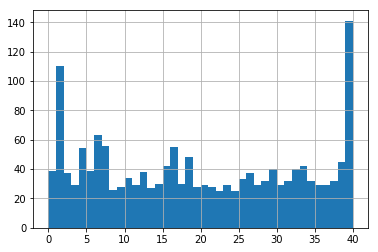

In [53]:
test_info.label.hist(bins=40)
train_info.label.hist

In [43]:
x_train = train_info[['1Q', '2Q', 'IQR', 'max', 'mean', 'median', 'min', 'skew', 'std']]
y_train = train_info['label']
x_test = test_info[['1Q', '2Q', 'IQR', 'max', 'mean', 'median', 'min', 'skew', 'std']]
y_test = test_info['label']

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

In [46]:
# SVM 
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear', random_state=RANDOM_SEED)
svc_classifier.fit(x_train, y_train)
y_pred_svc = svc_classifier.predict(x_test)

In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=RANDOM_SEED)
random_forest_classifier.fit(x_train, y_train)
y_pred_rfc = random_forest_classifier.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score as acc
acc_knn = acc(y_test, y_pred_knn)
acc_svc = acc(y_test, y_pred_svc)
acc_rfc = acc(y_test, y_pred_rfc)

In [49]:
acc_knn, acc_svc, acc_rfc

(0.176875, 0.141875, 0.250625)